In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [59]:
df.shape

(918, 12)

In [60]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [61]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [62]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [63]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [64]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [65]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

Text(0, 0.5, '')

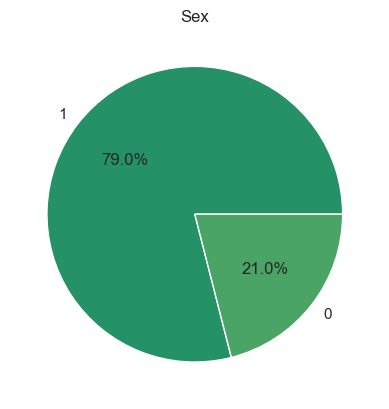

In [84]:
sns.set_palette('summer')
ax = df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
ax.set_title('Sex')
ax.set_ylabel('')

Text(0, 0.5, '')

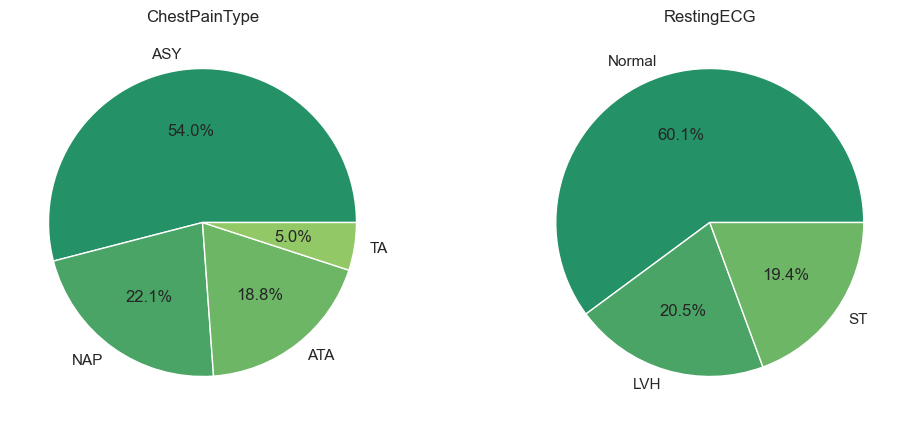

In [67]:
plt.figure(figsize=(12, 5))
sns.set_palette('summer')



plt.subplot(1,2,1)
ax = df['ChestPainType'].value_counts().plot(kind='pie', autopct='%1.1f%%')
ax.set_title('ChestPainType')
ax.set_ylabel('')


plt.subplot(1,2,2)
ax = df['RestingECG'].value_counts().plot(kind='pie', autopct='%1.1f%%')
ax.set_title('RestingECG')
ax.set_ylabel('')



Text(0, 0.5, '')

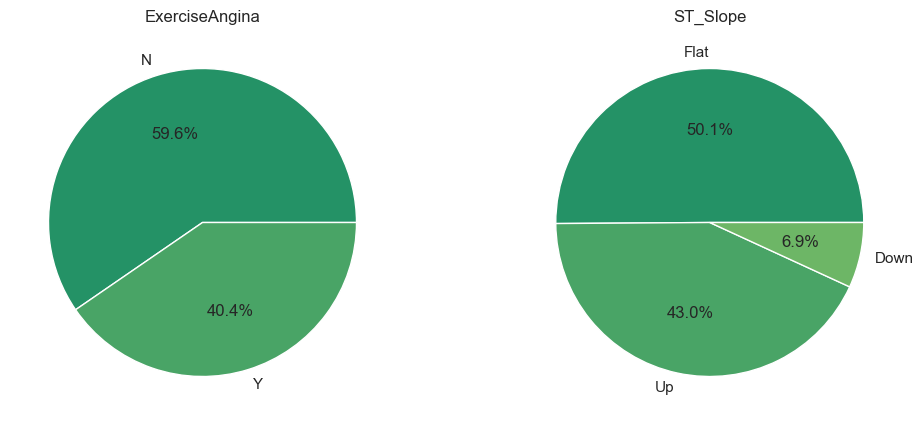

In [68]:
plt.figure(figsize=(12, 5))
sns.set_palette('summer')

plt.subplot(1,2,1)
ax = df['ExerciseAngina'].value_counts().plot(kind='pie', autopct='%1.1f%%')
ax.set_title('ExerciseAngina')
ax.set_ylabel('')


plt.subplot(1,2,2)
ax = df['ST_Slope'].value_counts().plot(kind='pie', autopct='%1.1f%%')
ax.set_title('ST_Slope')
ax.set_ylabel('')

In [69]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
df['Sex']=class_le.fit_transform(df['Sex'].values)
df['ChestPainType']=class_le.fit_transform(df['ChestPainType'].values)
df['RestingECG']=class_le.fit_transform(df['RestingECG'].values)
df['ExerciseAngina']=class_le.fit_transform(df['ExerciseAngina'].values)
df['ST_Slope']=class_le.fit_transform(df['ST_Slope'].values)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [70]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [71]:

df.duplicated().any()

False

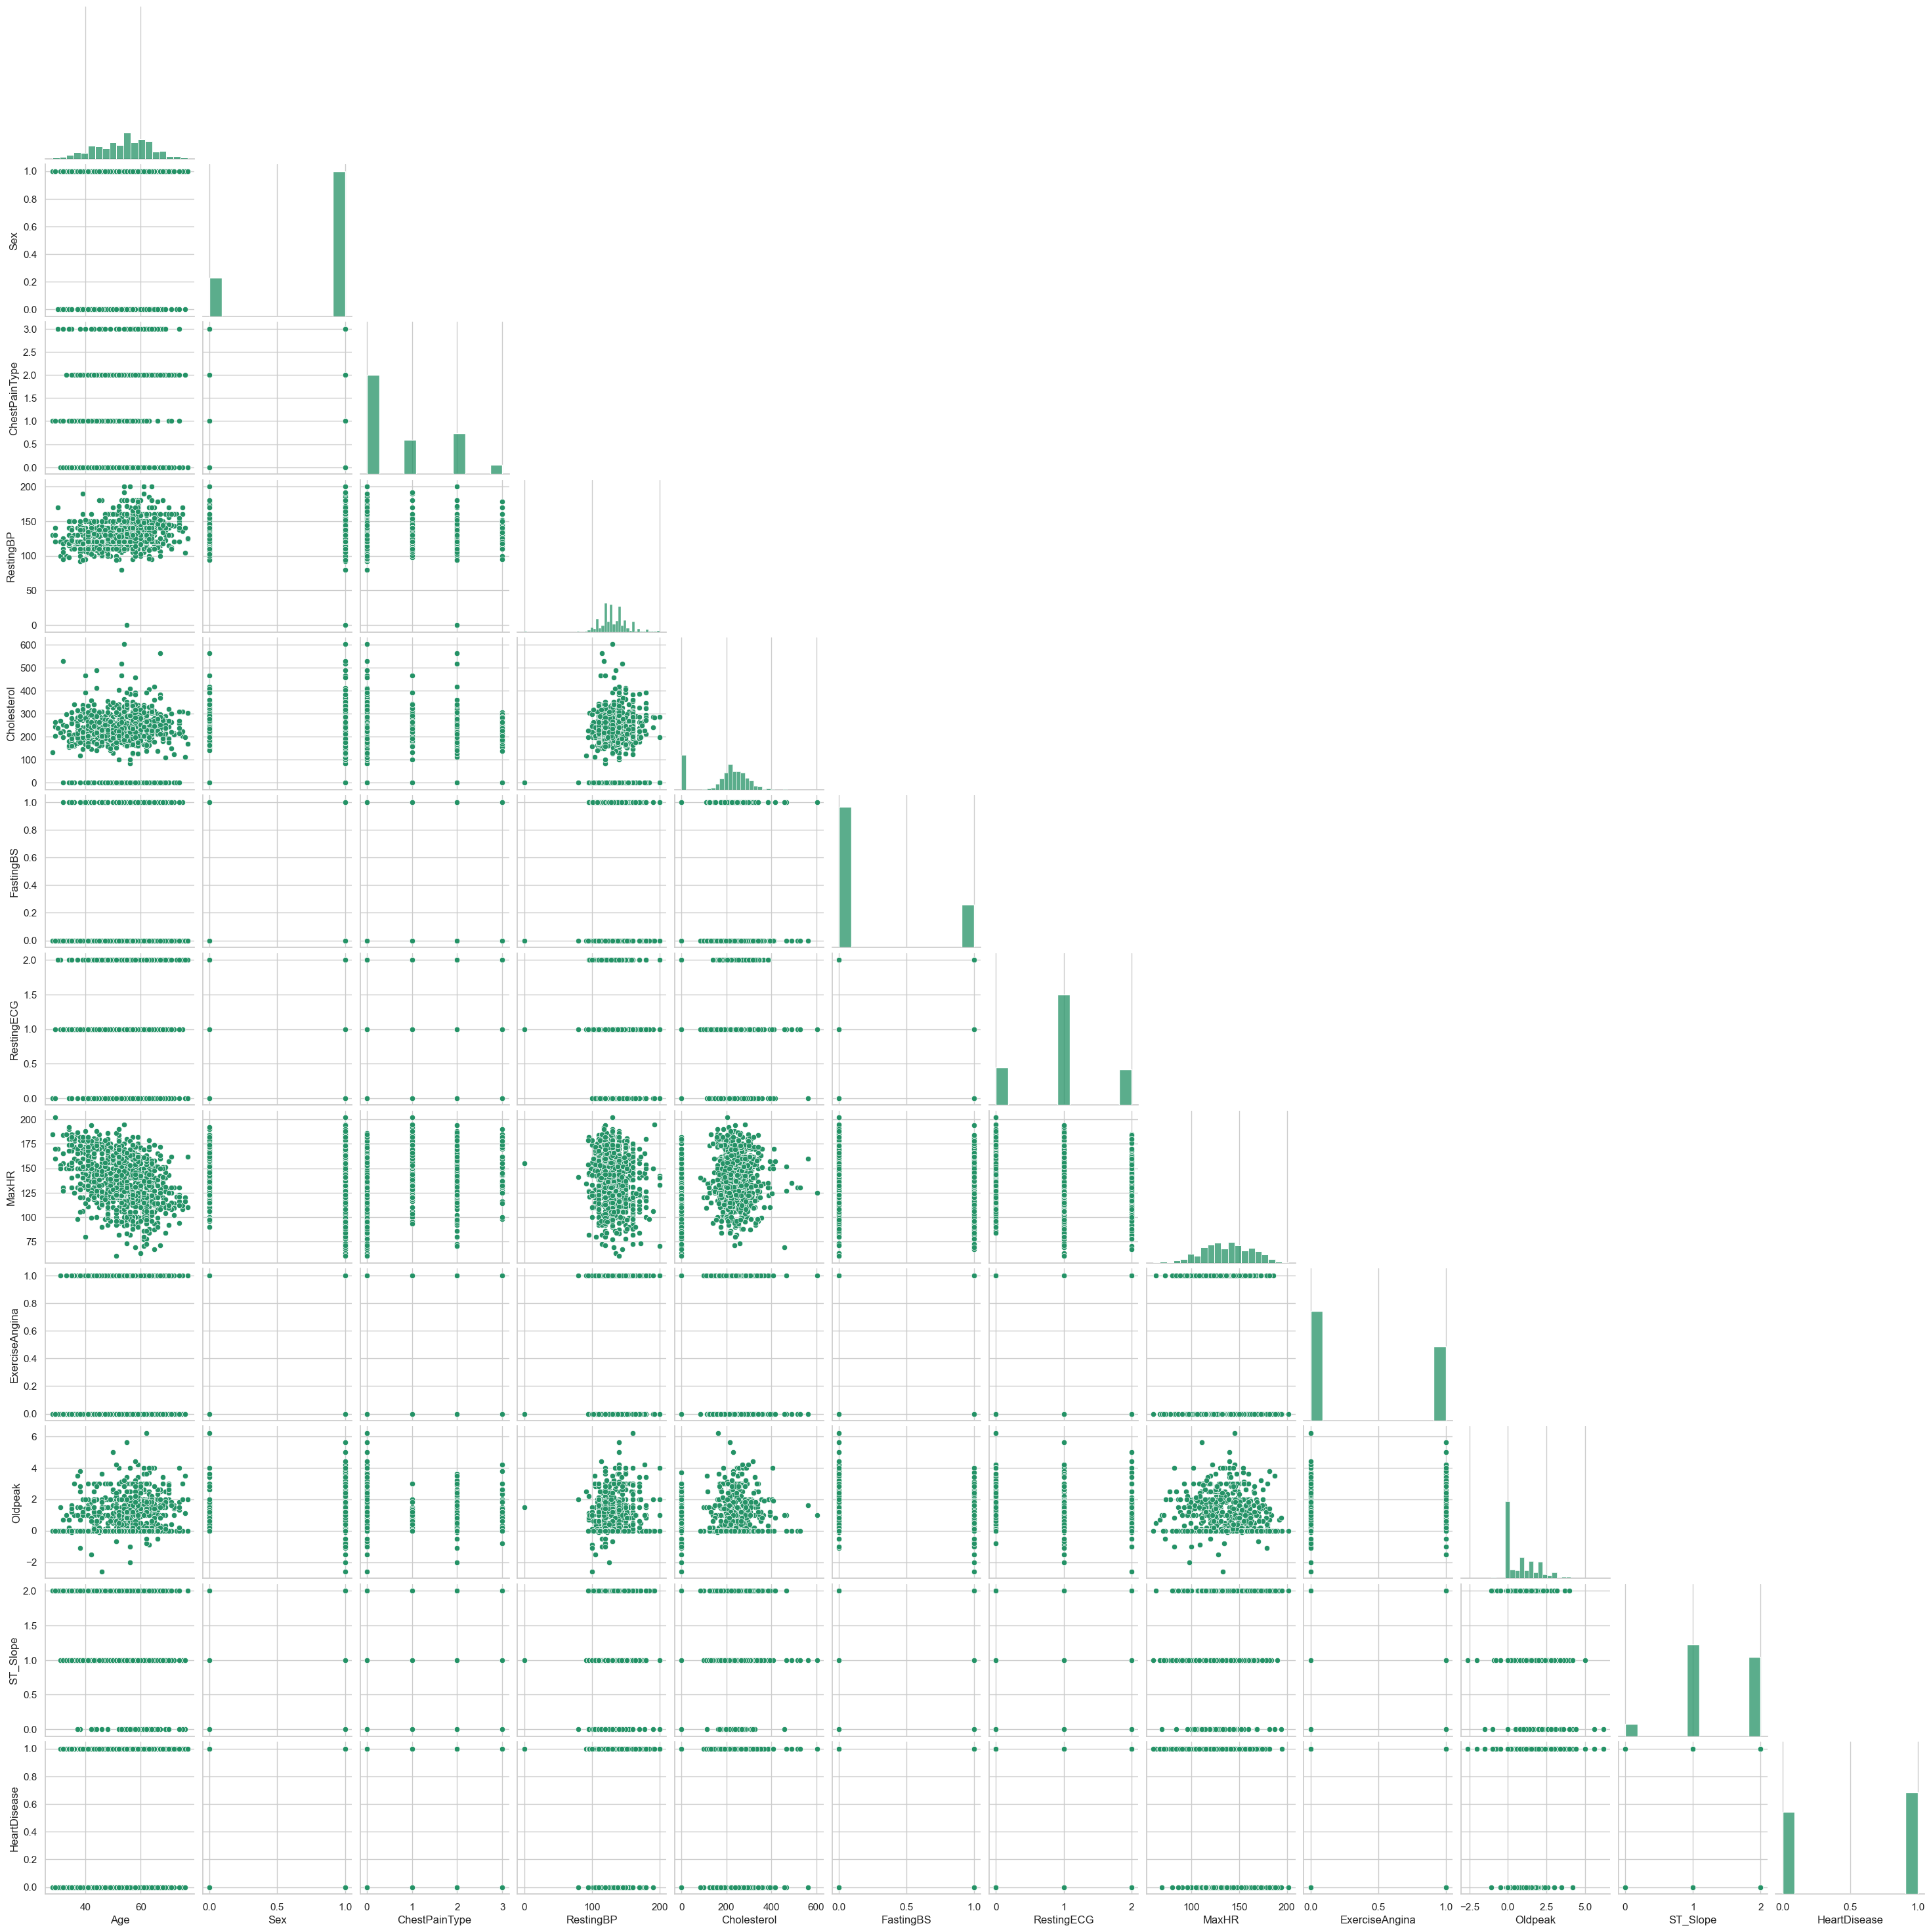

In [72]:
sns.pairplot(df, corner=True)

<Axes: >

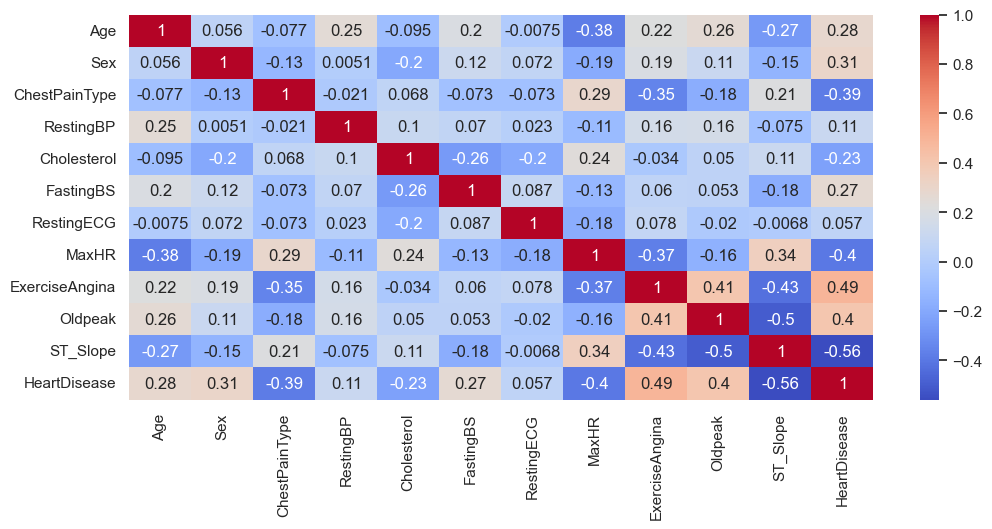

In [73]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [74]:
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

Accuracy of Decision Tree:  83.15217391304348 %



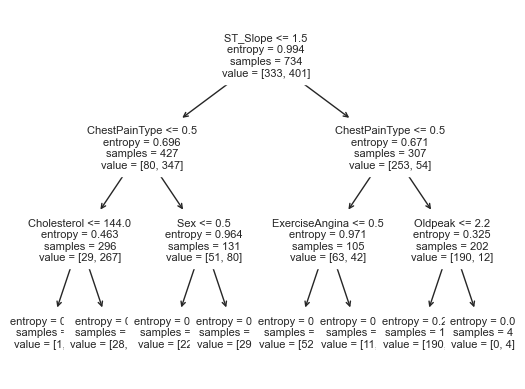

In [77]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth= 3,random_state = 0)
tree.fit(X_train, y_train)
plot_tree(tree, feature_names = df.columns ,fontsize = 8)
y_pred_test = tree.predict(X_test)
print("Accuracy of Decision Tree: ", accuracy_score(y_test, y_pred_test)*100, "%\n")
dtree_score = round(tree.score(X_test, y_test) * 100 ,2)



Confusion Matrix of Decision Tree


Text(47.25, 0.5, 'Actual')

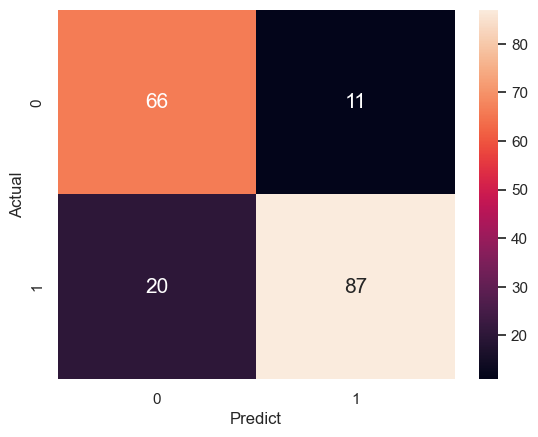

In [78]:
print("Confusion Matrix of Decision Tree")
cm = confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual")

Accuracy of Perceptron: 70.65217391304348 %



Text(47.25, 0.5, 'Actual')

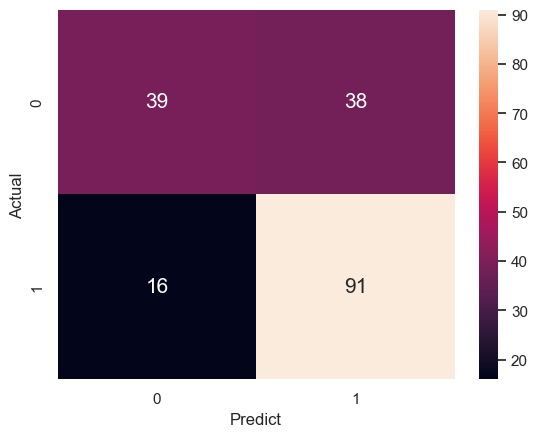

In [79]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train, y_train)
y_pred_ppn = ppn.predict(X_test)
print('Accuracy of Perceptron:', accuracy_score(y_test, y_pred_ppn) * 100, "%\n")

perceptron_score = round(accuracy_score(y_test, y_pred_ppn) * 100 , 2)
cm = confusion_matrix(y_test,y_pred_ppn)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual")

Accuracy of Random Forest: 86.95652173913044% 



Text(47.25, 0.5, 'Actual')

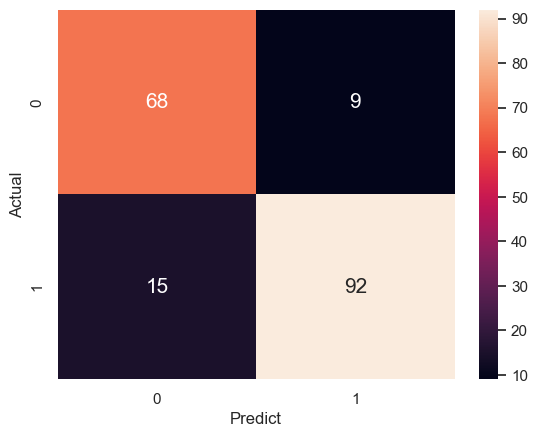

In [80]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_predictions = forest.predict(X_test)
forest_predictions[0:10]
y_test[0:10]
print("Accuracy of Random Forest: {}%".format(forest.score(X_test, y_test) * 100 ), "\n")
randomf_score = round(forest.score(X_test, y_test) * 100 ,2)

cm = confusion_matrix(y_test,forest_predictions)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual")

Accuracy of SVC:  83.69565217391305 %



Text(47.25, 0.5, 'Actual')

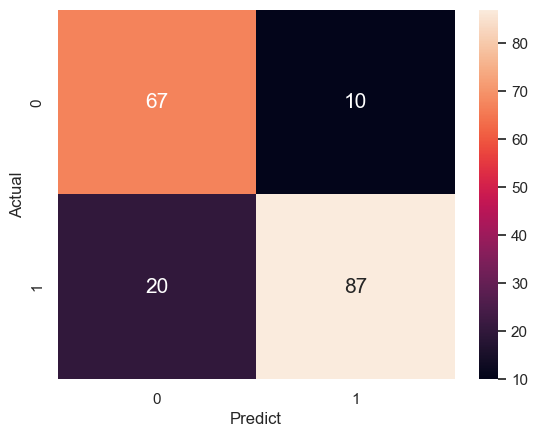

In [81]:
svm = SVC(kernel = 'linear', C = 1.0, random_state = 42)
svm.fit(X_train, y_train)
y_svm_test = svm.predict(X_test)
print("Accuracy of SVC: ", accuracy_score(y_test, y_svm_test) * 100, "%\n")
svc_score = round(accuracy_score(y_test, y_svm_test) * 100)

cm = confusion_matrix(y_test,y_svm_test)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [82]:
CompareModels = pd.DataFrame({
    'model' : [ 'Perceptron' ,'Decision Tree' ,
    'Random Forest' , 'SVC' ] ,
    'score' : [  perceptron_score , dtree_score ,
    randomf_score, svc_score
    ]  } )

[Text(0.5, 1.0, 'Score vs Model')]

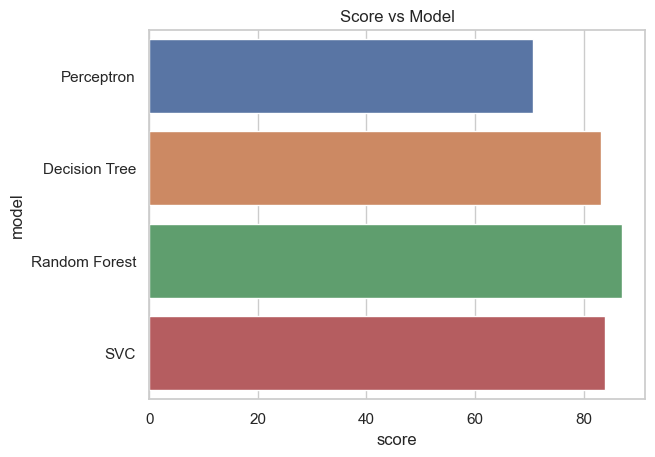

In [83]:
sns.set_theme(style="whitegrid")
sns.barplot(x='score' , y='model' , data=CompareModels).set(title='Score vs Model')